<a href="https://colab.research.google.com/github/zlfaris/Data-Mining-1/blob/main/TubesDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Membaca dataset asli
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")

# Dictionary terjemahan nama kolom dengan Huruf Besar Awal
kolom_baru = {
    "Date": "Tanggal",
    "Location ISO Code": "Lokasi_Iso",
    "Location": "Lokasi",
    "New Cases": "Kasus_Baru",
    "New Deaths": "Kematian_Baru",
    "New Recovered": "Sembuh_Baru",
    "New Active Cases": "Kasus_Aktif_Baru",
    "Total Cases": "Total_Kasus",
    "Total Deaths": "Total_Kematian",
    "Total Recovered": "Total_Sembuh",
    "Total Active Cases": "Total_Kasus_Aktif",
    "Location Level": "Level_Lokasi",
    "City or Regency": "Kota_Kabupaten",
    "Province": "Provinsi",
    "Country": "Negara",
    "Continent": "Benua",
    "Island": "Pulau",
    "Time Zone": "Zona_Waktu",
    "Special Status": "Status_Khusus",
    "Total Regencies": "Total_Kabupaten",
    "Total Cities": "Total_Kota",
    "Total Districts": "Total_Kecamatan",
    "Total Urban Villages": "Total_Kelurahan",
    "Total Rural Villages": "Total_Desa",
    "Area (km2)": "Luas_Km2",
    "Population": "Populasi",
    "Population Density": "Kepadatan_Penduduk",
    "Longitude": "Longitude",
    "Latitude": "Latitude",
    "New Cases per Million": "Kasus_Baru_Per_Juta",
    "Total Cases per Million": "Total_Kasus_Per_Juta",
    "New Deaths per Million": "Kematian_Baru_Per_Juta",
    "Total Deaths per Million": "Total_Kematian_Per_Juta",
    "Total Deaths per 100rb": "Total_Kematian_Per_100rb",
    "Case Fatality Rate": "Tingkat_Kematian",
    "Case Recovered Rate": "Tingkat_Kesembuhan",
    "Growth Factor of New Cases": "Faktor_Pertumbuhan_Kasus_Baru",
    "Growth Factor of New Deaths": "Faktor_Pertumbuhan_Kematian_Baru"
}

# Rename kolom
df = df.rename(columns=kolom_baru)

# Simpan file tanpa folder
output_file = "Covid-19_Indonesia_Dataset.csv"
df.to_csv(output_file, index=False)

print("File berhasil disimpan sebagai:", output_file)
print(df.head())


File berhasil disimpan sebagai: Covid-19_Indonesia_Dataset.csv
    Tanggal Lokasi_Iso       Lokasi  Kasus_Baru  Kematian_Baru  Sembuh_Baru  \
0  3/1/2020      ID-JK  DKI Jakarta           2              0            0   
1  3/2/2020      ID-JK  DKI Jakarta           2              0            0   
2  3/2/2020        IDN    Indonesia           2              0            0   
3  3/2/2020      ID-RI         Riau           1              0            0   
4  3/3/2020      ID-JK  DKI Jakarta           2              0            0   

   Kasus_Aktif_Baru  Total_Kasus  Total_Kematian  Total_Sembuh  ...  Latitude  \
0                 2           39              20            75  ... -6.204699   
1                 2           41              20            75  ... -6.204699   
2                 2            2               0             0  ... -0.789275   
3                 1            1               0             1  ...  0.511648   
4                 2           43              20         

### **CLASIFIKASI**

In [4]:
# Data Processing
import pandas as pd

# 1. Membaca dataset
dataset = pd.read_csv('Covid-19_Indonesia_Dataset.csv')

# 2. Pilih kolom inti epidemiologi
kolom_terpilih = [
    'Tanggal','Lokasi_Iso','Provinsi','Negara',
    'Kasus_Baru', 'Kematian_Baru', 'Sembuh_Baru', 'Kasus_Aktif_Baru',
    'Total_Kasus', 'Total_Kematian', 'Total_Sembuh', 'Total_Kasus_Aktif',
    'Kasus_Baru_Per_Juta', 'Total_Kasus_Per_Juta',
    'Tingkat_Kematian', 'Tingkat_Kesembuhan',
    'Faktor_Pertumbuhan_Kasus_Baru', 'Faktor_Pertumbuhan_Kematian_Baru'
]
dataset = dataset[kolom_terpilih]

# 3. Konversi kolom numerik
kolom_numerik = [
    'Kasus_Baru', 'Kematian_Baru', 'Sembuh_Baru', 'Kasus_Aktif_Baru',
    'Total_Kasus', 'Total_Kematian', 'Total_Sembuh', 'Total_Kasus_Aktif',
    'Kasus_Baru_Per_Juta', 'Total_Kasus_Per_Juta',
    'Tingkat_Kematian', 'Tingkat_Kesembuhan',
    'Faktor_Pertumbuhan_Kasus_Baru', 'Faktor_Pertumbuhan_Kematian_Baru'
]

# Hapus tanda persen dan ubah ke float untuk kolom persentase
for kolom in ['Tingkat_Kematian', 'Tingkat_Kesembuhan']:
    dataset[kolom] = dataset[kolom].replace('%','', regex=True).astype(float)

# Konversi semua kolom numerik lainnya
for kolom in kolom_numerik:
    dataset[kolom] = pd.to_numeric(dataset[kolom], errors='coerce')

# 4. Tangani nilai kosong / missing value
dataset.fillna(0, inplace=True)

# 5. Membuat label risiko berdasarkan Kasus_Baru_Per_Juta
def label_risiko(nilai):
    if nilai > 0.5:
        return "Risiko Tinggi"
    elif nilai >= 0.1:
        return "Risiko Sedang"
    else:
        return "Risiko Rendah"

dataset["Level_Risiko"] = dataset["Kasus_Baru_Per_Juta"].apply(label_risiko)

# 6. Konversi label risiko ke numerik
pemetaan_risiko = {"Risiko Rendah": 0, "Risiko Sedang": 1, "Risiko Tinggi": 2}
dataset["Label_Numerik"] = dataset["Level_Risiko"].map(pemetaan_risiko)

# 7. Tampilkan eksplorasi dataset
print("Head Dataset")
print(dataset.head(), "\n")

print("Info Dataset")
print(dataset.info(), "\n")

print("Statistik Deskriptif")
print(dataset.describe(include='all'), "\n")

# 8. Simpan dataset hasil preprocessing
file_hasil = 'covid_dataset_lebeling_resiko.csv'
dataset.to_csv(file_hasil, index=False)

print("Dataset berhasil disimpan sebagai:", file_hasil)


Head Dataset
    Tanggal Lokasi_Iso     Provinsi     Negara  Kasus_Baru  Kematian_Baru  \
0  3/1/2020      ID-JK  DKI Jakarta  Indonesia           2              0   
1  3/2/2020      ID-JK  DKI Jakarta  Indonesia           2              0   
2  3/2/2020        IDN            0  Indonesia           2              0   
3  3/2/2020      ID-RI         Riau  Indonesia           1              0   
4  3/3/2020      ID-JK  DKI Jakarta  Indonesia           2              0   

   Sembuh_Baru  Kasus_Aktif_Baru  Total_Kasus  Total_Kematian  Total_Sembuh  \
0            0                 2           39              20            75   
1            0                 2           41              20            75   
2            0                 2            2               0             0   
3            0                 1            1               0             1   
4            0                 2           43              20            75   

   Total_Kasus_Aktif  Kasus_Baru_Per_Juta  Total_

In [6]:
# Modeling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Load dataset hasil preprocessing
data = pd.read_csv('covid_dataset_lebeling_resiko.csv')

# 2. Tentukan fitur (X) dan label (y)
fitur = [
    'Kasus_Baru', 'Kematian_Baru', 'Sembuh_Baru', 'Kasus_Aktif_Baru',
    'Total_Kasus', 'Total_Kematian', 'Total_Sembuh', 'Total_Kasus_Aktif',
    'Kasus_Baru_Per_Juta', 'Total_Kasus_Per_Juta',
    'Tingkat_Kematian', 'Tingkat_Kesembuhan',
    'Faktor_Pertumbuhan_Kasus_Baru', 'Faktor_Pertumbuhan_Kematian_Baru'
]

X = data[fitur]
y = data['Label_Numerik']

# 3. Split data menjadi train dan test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Buat dan latih model Random Forest
model_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

model_rf.fit(X_train, y_train)

print("Model berhasil dilatih")

Model berhasil dilatih



Hasil Evaluasi Random Forest
Akurasi  : 1.0000
Presisi  : 1.0000
Recall   : 1.0000
F1-Score : 1.0000

Classification Report
               precision    recall  f1-score   support

Risiko Rendah       1.00      1.00      1.00       802
Risiko Sedang       1.00      1.00      1.00       417
Risiko Tinggi       1.00      1.00      1.00      5146

     accuracy                           1.00      6365
    macro avg       1.00      1.00      1.00      6365
 weighted avg       1.00      1.00      1.00      6365



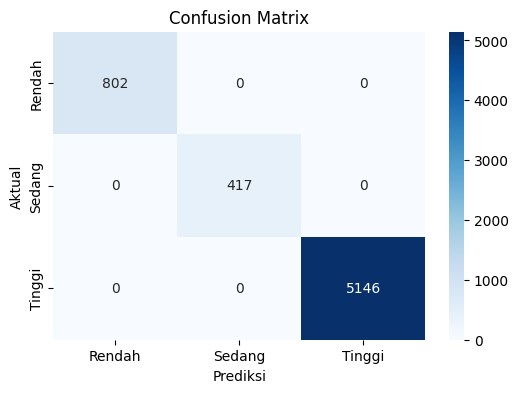


Hasil Cross Validation
Akurasi per fold : [0.9930872  1.         0.99984287 1.         1.        ]
Rata-rata akurasi: 0.9985860123445758
Standar deviasi  : 0.002750081826666292


In [7]:
# Evaluasi Model, Confusion Matrix dan Cross Validation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prediksi pada data test
y_prediksi = model_rf.predict(X_test)

# 2. Hitung metrik evaluasi
akurasi = accuracy_score(y_test, y_prediksi)
presisi = precision_score(y_test, y_prediksi, average='weighted')
recall = recall_score(y_test, y_prediksi, average='weighted')
f1 = f1_score(y_test, y_prediksi, average='weighted')

print("\nHasil Evaluasi Random Forest")
print(f"Akurasi  : {akurasi:.4f}")
print(f"Presisi  : {presisi:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

# 3. Classification Report
print("\nClassification Report")
print(classification_report(
    y_test, y_prediksi,
    target_names=["Risiko Rendah", "Risiko Sedang", "Risiko Tinggi"]
))

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_prediksi)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Rendah", "Sedang", "Tinggi"],
            yticklabels=["Rendah", "Sedang", "Tinggi"])
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# 5. Cross Validation (5-Fold)
skor_cv = cross_val_score(model_rf, X, y, cv=5, scoring='accuracy')

print("\nHasil Cross Validation")
print("Akurasi per fold :", skor_cv)
print("Rata-rata akurasi:", skor_cv.mean())
print("Standar deviasi  :", skor_cv.std())


## **CLUSTERING**

In [30]:
import pandas as pd

df = pd.read_csv("Covid-19_Indonesia_Dataset.csv")

# Ubah kolom Tanggal menjadi datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%m/%d/%Y')
df_cluster = df[df['Tanggal'] == '2022-09-15'].copy()

# Hapus baris tanpa Provinsi (misal data negara)
df_cluster = df_cluster[df_cluster["Provinsi"].notnull()]


# Pilih kolom penting
df_cluster = df_cluster[['Provinsi','Total_Kasus','Total_Kematian','Total_Sembuh',
                         'Kepadatan_Penduduk','Populasi','Total_Kasus_Per_Juta','Total_Kematian_Per_Juta']].copy()

# Tambahkan kolom rasio
df_cluster['Rasio_Kematian'] = df_cluster['Total_Kematian'] / df_cluster['Total_Kasus']
df_cluster['Rasio_Kesembuhan'] = df_cluster['Total_Sembuh'] / df_cluster['Total_Kasus']

# Tampilkan 5 data teratas
print("5 Data Teratas Setelah Dipilih")
print(df_cluster.head())

5 Data Teratas Setelah Dipilih
          Provinsi  Total_Kasus  Total_Kematian  Total_Sembuh  \
31788         Aceh        44038            2223         41713   
31789         Bali       166831            4731        161629   
31790       Banten       333875            2950        328482   
31791     Bengkulu        29173             522         28617   
31792  DKI Jakarta      1412511           15513       1386134   

       Kepadatan_Penduduk  Populasi  Total_Kasus_Per_Juta  \
31788               90.54   5247257               8392.58   
31789              729.43   4216171              39569.32   
31790             1109.64  10722374              31138.16   
31791              100.38   1999539              14589.86   
31792            16334.31  10846145             130231.62   

       Total_Kematian_Per_Juta  Rasio_Kematian  Rasio_Kesembuhan  
31788                   423.65        0.050479          0.947205  
31789                  1122.11        0.028358          0.968819  
31790     

In [31]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Pilih fitur numerik untuk clustering
fitur = ['Total_Kasus','Total_Kematian','Total_Sembuh',
         'Kepadatan_Penduduk','Populasi','Total_Kasus_Per_Juta',
         'Total_Kematian_Per_Juta','Rasio_Kematian','Rasio_Kesembuhan']

# Scaling dengan MinMaxScaler (0-1)
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df_cluster[fitur]),
    columns=fitur,
    index=df_cluster['Provinsi']
)

# Tampilkan 5 data teratas setelah scaling
print("=== 5 Data Teratas Setelah Scaling ===")
print(scaled_df.head())


=== 5 Data Teratas Setelah Scaling ===
             Total_Kasus  Total_Kematian  Total_Sembuh  Kepadatan_Penduduk  \
Provinsi                                                                     
Aceh            0.021062        0.058083      0.020021            0.005020   
Bali            0.108902        0.133639      0.107430            0.044154   
Banten          0.228397        0.079984      0.229053            0.067443   
Bengkulu        0.010428        0.006839      0.010475            0.005622   
DKI Jakarta     1.000000        0.458456      1.000000            1.000000   

             Populasi  Total_Kasus_Per_Juta  Total_Kematian_Per_Juta  \
Provinsi                                                               
Aceh         0.103315              0.012281                 0.193480   
Bali         0.080151              0.265023                 0.659439   
Banten       0.226316              0.196674                 0.094398   
Bengkulu     0.030354              0.062521           

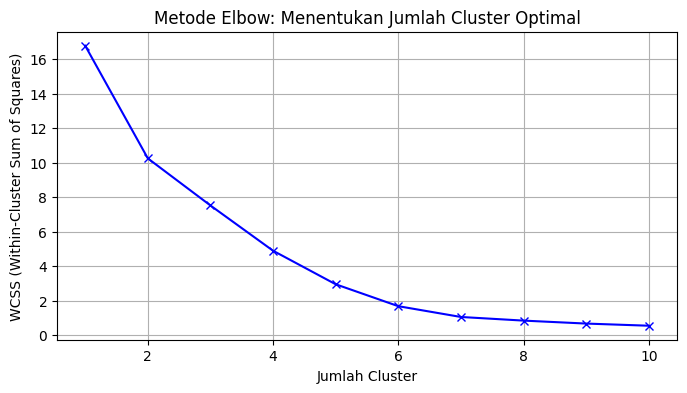

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method: Menentukan jumlah cluster optimal
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,       # jumlah cluster yang diuji
        init='k-means++',   # metode inisialisasi centroid
        max_iter=300,       # maksimal iterasi
        n_init=10,          # jumlah inisialisasi ulang
        random_state=42
    )
    kmeans.fit(scaled_df)  # scaled_df = data fitur yang sudah dinormalisasi
    wcss.append(kmeans.inertia_)  # simpan WCSS untuk tiap jumlah cluster

# Visualisasi Elbow Method
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('Metode Elbow: Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


In [33]:
# Modeling
from sklearn.cluster import KMeans
# Pilih jumlah cluster berdasarkan Elbow, misal k=5
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_df)

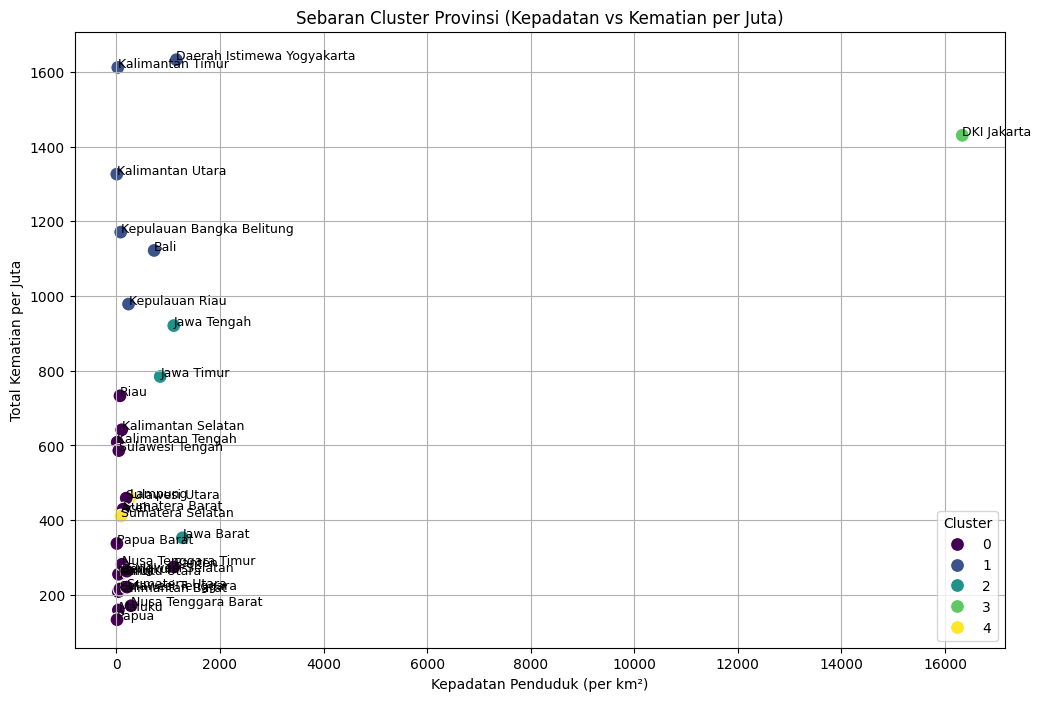

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.scatterplot(data=df_cluster,
                x='Kepadatan_Penduduk',
                y='Total_Kematian_Per_Juta',
                hue='Cluster',
                palette='viridis', s=100)

# Tambahkan label provinsi
for i in range(len(df_cluster)):
    plt.text(x=df_cluster['Kepadatan_Penduduk'].iloc[i],
             y=df_cluster['Total_Kematian_Per_Juta'].iloc[i],
             s=df_cluster['Provinsi'].iloc[i], fontsize=9)

plt.title('Sebaran Cluster Provinsi (Kepadatan vs Kematian per Juta)')
plt.xlabel('Kepadatan Penduduk (per km²)')
plt.ylabel('Total Kematian per Juta')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [74]:
# Karakteristik rata-rata tiap cluster
summary = df_cluster.groupby('Cluster')[fitur].mean()
print("\nKarakteristik Rata-rata Tiap Cluster")
print(summary)

# Daftar provinsi tiap cluster
print("\nDaftar Provinsi Per Cluster")
for i in sorted(df_cluster['Cluster'].unique()):
    provinsi = df_cluster[df_cluster['Cluster'] == i]['Provinsi'].values
    print(f"Cluster {i} ({len(provinsi)} Provinsi):")
    print(", ".join(provinsi))
    print("-" * 45)



Karakteristik Rata-rata Tiap Cluster
          Total_Kasus  Total_Kematian  Total_Sembuh  Kepadatan_Penduduk  \
Cluster                                                                   
0        8.206784e+04     1567.105263  8.021421e+04          150.049474   
1        1.304332e+05     3458.166667  1.267022e+05          373.948333   
2        8.038950e+05    27063.333333  7.716260e+05         1077.323333   
3        1.412511e+06    15513.000000  1.386134e+06        16334.310000   
4        6.724033e+04     3261.666667  6.376533e+04          147.653333   

             Populasi  Total_Kasus_Per_Juta  Total_Kematian_Per_Juta  \
Cluster                                                                
0        4.825104e+06          16795.220000               342.026842   
1        2.559492e+06          52484.530000              1307.125000   
2        4.066814e+07          19450.480000               686.176667   
3        1.084614e+07         130231.620000              1430.280000   
4   

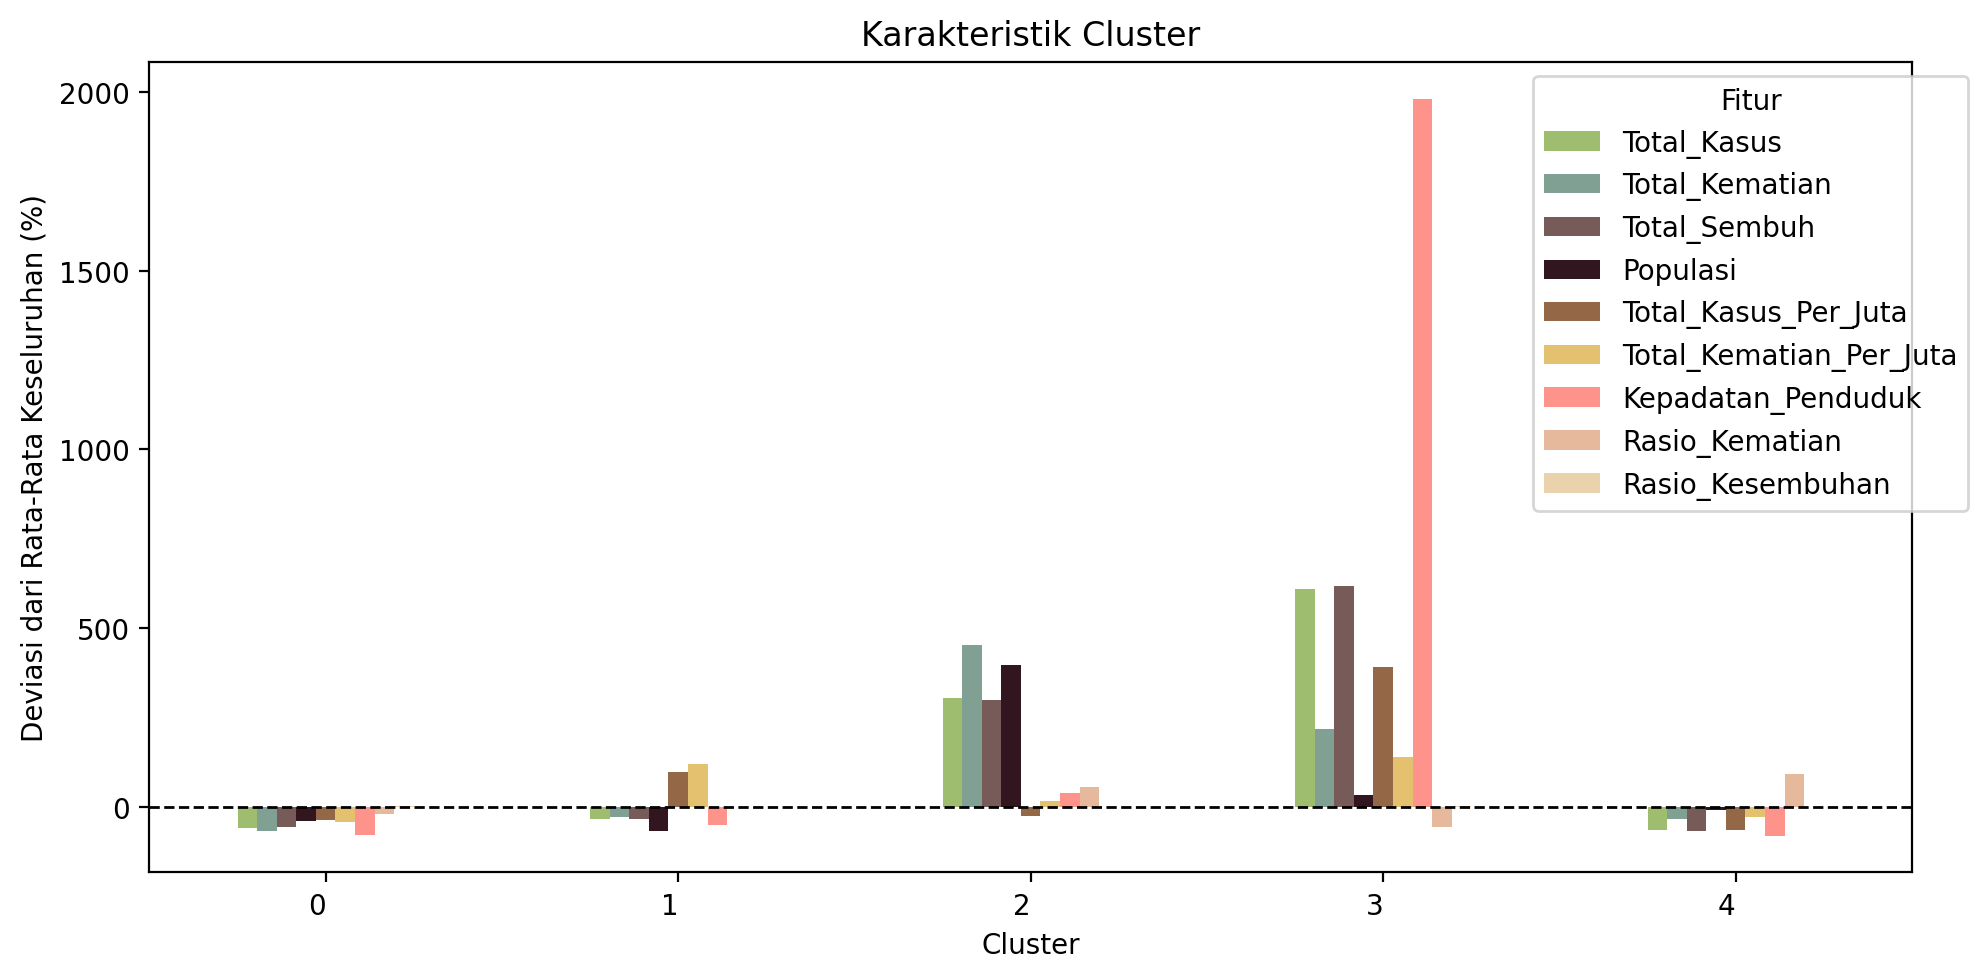

In [41]:
# Visualisasi
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan df_cluster sudah memiliki kolom 'Cluster' dan features yang ingin dianalisis
# Misal features = ['Total_Kasus','Total_Kematian','Total_Sembuh', 'Rasio_Kematian', 'Rasio_Kesembuhan']
features = ['Total_Kasus','Total_Kematian','Total_Sembuh','Populasi','Total_Kasus_Per_Juta','Total_Kematian_Per_Juta','Kepadatan_Penduduk','Rasio_Kematian','Rasio_Kesembuhan']

# 1. Hitung rata-rata keseluruhan
overall_mean = df_cluster[features].mean()

# 2. Hitung rata-rata tiap cluster lalu transpose
cluster_mean = df_cluster.groupby('Cluster')[features].mean().T

# 3. Hitung deviasi relatif terhadap rata-rata keseluruhan (%)
df_dev_rel = ((cluster_mean - overall_mean.values.reshape(-1,1)) / overall_mean.values.reshape(-1,1)) * 100
df_dev_rel = df_dev_rel.round(2)

# 4. Tentukan warna untuk tiap fitur
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846',
          '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D']

# 5. Plot grafik
fig = plt.figure(figsize=(10,5), dpi=200)
df_dev_rel.T.plot(
    kind='bar',
    ax=fig.add_subplot(),
    title="Karakteristik Cluster",
    color=colors[:len(features)],  # sesuaikan jumlah warna dengan fitur
    xlabel="Cluster",
    ylabel="Deviasi dari Rata-Rata Keseluruhan (%)"
)

# Tambahkan garis horizontal di 0
plt.axhline(y=0, linewidth=1, ls='--', color='black')

# Legend di sisi kanan
plt.legend(title="Fitur", bbox_to_anchor=(1.04, 1))

# Rotasi sumbu X tetap 0
fig.autofmt_xdate(rotation=0)

plt.tight_layout()
plt.show()

**Cluster 0**

(19 Provinsi: Banten, Bengkulu, Jambi, Kalimantan Barat, Kalimantan Selatan, Kalimantan Tengah, Maluku, Maluku Utara, NTB, NTT, Papua, Papua Barat, Riau, Sulawesi Selatan, Sulawesi Tengah, Sulawesi Tenggara, Sulawesi Utara, Sumatera Barat, Sumatera Utara)

Cluster ini memiliki total kasus, total kematian, dan total kasus per populasi yang relatif rendah dibanding rata-rata nasional. Tingkat kematian per populasi juga berada pada salah satu yang paling rendah, sementara tingkat pemulihan cukup tinggi.

Kesimpulan:
Provinsi pada klaster ini umumnya menunjukkan kinerja yang baik dalam tindakan preventif dan penanganan Covid-19. Penyebaran lebih terkendali dan angka kematian relatif rendah.

**Cluster 1**

(6 Provinsi: Bali, DIY, Kalimantan Timur, Kalimantan Utara, Kep. Bangka Belitung, Kep. Riau)

Cluster ini memiliki jumlah total kasus yang tidak terlalu besar, tetapi hal ini dipengaruhi oleh populasi provinsinya yang juga kecil. Ketika dilihat dalam ukuran kasus per populasi dan kematian per populasi, klaster ini menunjukkan nilai yang cukup tinggi.
Kesimpulan:
Upaya preventif dan pengendalian penyebaran kemungkinan masih perlu ditingkatkan. Tingginya kasus dan kematian relatif terhadap populasi menunjukkan bahwa risiko transmisi dan fatalitas tetap perlu mendapatkan perhatian

**Cluster 2**

(3 Provinsi: Jawa Barat, Jawa Tengah, Jawa Timur)

Klaster ini memiliki populasi terbesar setelah DKI, dengan kepadatan penduduk tinggi. Total kasus sangat tinggi, tetapi kasus per populasi termasuk salah satu yang paling rendah. Namun, angka kematian total dan kematian per populasi sangat tinggi, sementara tingkat kesembuhan relatif rendah.

Kesimpulan:
Provinsi dalam klaster ini perlu meningkatkan penanganan medis, ketersediaan fasilitas kesehatan, dan respons terhadap kasus berat, karena tingginya angka kematian menunjukkan adanya tekanan tinggi pada sistem kesehatan.

**Cluster 3**

(1 Provinsi: DKI Jakarta)

Klaster ini memiliki kepadatan populasi tertinggi, sehingga wajar jika memiliki total kasus dan kasus per populasi tertinggi. Meski demikian, DKI menunjukkan tingkat pemulihan tertinggi dan tingkat kematian terendah dibanding klaster lainnya.

Kesimpulan:
Penanganan medis di DKI Jakarta sangat baik, tetapi tingginya mobilitas dan kepadatan penduduk membuat upaya preventif (pengetatan protokol, pengendalian mobilitas) tetap perlu mendapat perhatian.

**Cluster 4**

(3 Provinsi: Aceh, Lampung, Sumatera Selatan)

Klaster ini termasuk provinsi dengan total kasus dan kasus per populasi terendah, tetapi memiliki tingkat pemulihan rendah dan tingkat kematian paling tinggi. Ini menunjukkan ketidakseimbangan antara rendahnya penyebaran dan lemahnya penanganan kasus berat.

Kesimpulan:
Penanganan terhadap pasien Covid-19 perlu ditingkatkan, terutama pada kualitas perawatan dan kecepatan penanganan kasus serius.

## **ASOSIASI**

In [66]:
!pip install mlxtend pandas
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Data Processing
# Load dataset
df = pd.read_csv("covid_dataset_lebeling_resiko.csv")
print("Dataset Awal")
print(df.head())

# Pilih kolom relevan
df = df[[
    "Faktor_Pertumbuhan_Kasus_Baru",
    "Label_Numerik",
    "Level_Risiko"
]]

# Membuat variabel biner untuk asosiasi
df["Kasus_Naik"] = df["Faktor_Pertumbuhan_Kasus_Baru"] > 1
df["Risiko_Tinggi"] = df["Label_Numerik"] == 2

print("\nData Setelah Pemrosesan")
print(df[["Faktor_Pertumbuhan_Kasus_Baru", "Kasus_Naik", "Risiko_Tinggi"]].head())

# Data biner untuk Apriori
df_bin = df[["Kasus_Naik", "Risiko_Tinggi"]].astype(bool)
print("\nData Biner Untuk Apriori")
print(df_bin.head())

Dataset Awal
    Tanggal Lokasi_Iso     Provinsi     Negara  Kasus_Baru  Kematian_Baru  \
0  3/1/2020      ID-JK  DKI Jakarta  Indonesia           2              0   
1  3/2/2020      ID-JK  DKI Jakarta  Indonesia           2              0   
2  3/2/2020        IDN            0  Indonesia           2              0   
3  3/2/2020      ID-RI         Riau  Indonesia           1              0   
4  3/3/2020      ID-JK  DKI Jakarta  Indonesia           2              0   

   Sembuh_Baru  Kasus_Aktif_Baru  Total_Kasus  Total_Kematian  Total_Sembuh  \
0            0                 2           39              20            75   
1            0                 2           41              20            75   
2            0                 2            2               0             0   
3            0                 1            1               0             1   
4            0                 2           43              20            75   

   Total_Kasus_Aktif  Kasus_Baru_Per_Juta  Total_

In [67]:
# Pembentukan Aturan Asosiasi
min_support_value = 0.1   # 10%

# Apriori: menemukan pola yang sering muncul
frequent_items = apriori(
    df_bin,
    min_support=min_support_value,
    use_colnames=True
)

print("\nFrequent Itemsets (Pola Yang Sering Muncul)")
print(frequent_items)


Frequent Itemsets (Pola Yang Sering Muncul)
    support                     itemsets
0  0.371190                 (Kasus_Naik)
1  0.800233              (Risiko_Tinggi)
2  0.362422  (Risiko_Tinggi, Kasus_Naik)


In [68]:
# Pemilihan Parameter Support dan Confidence
rules = association_rules(
    frequent_items,
    metric="confidence",
    min_threshold=0.1
)

print("\nSemua Rules")
print(rules)


Semua Rules
       antecedents      consequents  antecedent support  consequent support  \
0  (Risiko_Tinggi)     (Kasus_Naik)            0.800233            0.371190   
1     (Kasus_Naik)  (Risiko_Tinggi)            0.371190            0.800233   

    support  confidence     lift  representativity  leverage  conviction  \
0  0.362422    0.452896  1.22012               1.0  0.065384    1.149343   
1  0.362422    0.976380  1.22012               1.0  0.065384    8.457538   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.903093  0.447988   0.129938    0.714638  
1       0.286905  0.447988   0.881762    0.714638  


In [70]:
# Analisis Pola Asosiasi
# Aturan yang dicari: Kasus_Naik → Risiko_Tinggi
rule = rules[
    (rules["antecedents"] == {"Kasus_Naik"}) &
    (rules["consequents"] == {"Risiko_Tinggi"})
]

print("\nRule: Kasus Naik → Risiko Tinggi")
print(rule[["antecedents", "consequents", "support", "confidence", "lift"]])


Rule: Kasus Naik → Risiko Tinggi
    antecedents      consequents   support  confidence     lift
1  (Kasus_Naik)  (Risiko_Tinggi)  0.362422     0.97638  1.22012


In [73]:
# Interpretasi Hasil
if not rule.empty:
    print("Interpretasi Rule:")
    print(f"- Support     : {rule['support'].values[0]:.3f}")
    print(f"- Confidence  : {rule['confidence'].values[0]:.3f}")
    print(f"- Lift        : {rule['lift'].values[0]:.3f}")

    print("\nMakna:")
    print("Jika faktor pertumbuhan kasus > 1 (kasus naik),")
    print("maka peluang wilayah berada pada Risiko Tinggi semakin besar.")
else:
    print("\nAturan 'Kasus Naik → Risiko Tinggi' tidak muncul.")
    print("Hal ini berarti support atau confidence terlalu rendah.")

Interpretasi Rule:
- Support     : 0.362
- Confidence  : 0.976
- Lift        : 1.220

Makna:
Jika faktor pertumbuhan kasus > 1 (kasus naik),
maka peluang wilayah berada pada Risiko Tinggi semakin besar.
